In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import altair as alt
import squarify
import geopandas as gpd
import json
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
data_2022 = pd.read_csv("Data/2022.csv", usecols=['INCIDENT_NUMBER', 'DISTRICT', 'CATEGORY'], dtype={'INCIDENT_NUMBER':str, 'DISTRICT':str, 'CATEGORY':str})
rox_2022 = data_2022.loc[data_2022['DISTRICT'] == 'B2']
fen_2022 = data_2022.loc[data_2022['DISTRICT'] == 'D4']
df_rox_2022 = rox_2022.groupby(['CATEGORY'])['INCIDENT_NUMBER'].count()
df_rox_2022 = df_rox_2022.sort_values(ascending=False)
rox_values_2022_sorted = squarify.normalize_sizes(df_rox_2022, 1000, 1000)
df_fenway_2022 = fen_2022.groupby(['CATEGORY'])['INCIDENT_NUMBER'].count()
df_fenway_2022_sorted = df_fenway_2022.sort_values(ascending=False)
fenway_values_2022_sorted = squarify.normalize_sizes(df_fenway_2022, 1000, 1000)

In [3]:
output_json = pd.DataFrame(squarify.padded_squarify(sizes=rox_values_2022_sorted, x=0, y=0, dx=1000, dy=1000))
output_json.insert(0, "Incident Count", df_rox_2022.array)
output_json.insert(0, "Category", df_rox_2022.keys())
output_json["x2"] = output_json["x"] + output_json["dx"]
output_json["y2"] = output_json["y"] + output_json["dy"]


In [4]:
alt.Chart(output_json).mark_rect().encode(
    x=alt.X('x:Q', axis=None),
    x2='x2:Q',
    y=alt.Y('y:Q', axis=None),
    y2='y2:Q',
    color=alt.Color("Category", type="nominal", sort=alt.EncodingSortField(field="Incident Count", order="descending"))
).properties(
    width=1000,
    height=1000
)

alt.Chart(...)

In [99]:
capital_plan = pd.read_excel('Data/23R Capital Plan 4.13.22.xlsx')
boston_map = gpd.read_file("Data/city-council-districts.geojson")

single_selection = alt.selection_point()

## bugfix taken from https://github.com/altair-viz/altair/issues/1612
boston_map.crs = {'init' :'epsg:27700'}
boston_map = boston_map.to_crs({'init': 'epsg:4326'})
choro_json = json.loads(boston_map.to_json())
boston_chart = alt.Chart(boston_map).mark_geoshape(
    strokeWidth=1,
    fill='none',
    fillOpacity=0,
    stroke='black'
).encode().properties(
    width=800,
    height=800
)

neighborhoods_map = gpd.read_file("Data/boston-neighborhoods.geojson");
neighborhoods_map.crs = {'init' :'epsg:27700'}
neighborhoods_map = neighborhoods_map.to_crs({'init': 'epsg:4326'})
choro_json = json.loads(neighborhoods_map.to_json())
neighborhoods_chart = alt.Chart(neighborhoods_map, title="Boston Districts by Total Budget").mark_geoshape(
    stroke='black',
    strokeWidth=.2,
).encode(
    color=alt.condition(single_selection, 'Name:N', alt.value('lightgray'))
).properties(
    width=800,
    height=800
).add_params(
    single_selection
);

base = alt.Chart(capital_plan).mark_bar().encode(
    x='Neighborhood',
    y='sum(Total_Project_Budget):Q',
).encode(
    color=alt.condition(single_selection, 'Neighborhood', alt.value('lightgray')),
    tooltip=alt.Tooltip("sum(Total_Project_Budget)", format="$,.2f"),
).add_params(
    single_selection
);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [101]:
alt.vconcat(neighborhoods_chart + boston_chart, base)

alt.VConcatChart(...)

In [7]:
data_2021 = pd.read_csv("Data/2021.csv", usecols=['INCIDENT_NUMBER', 'DISTRICT', 'CATEGORY'], dtype={'INCIDENT_NUMBER':str, 'DISTRICT':str, 'CATEGORY':str})
rox_2021 = data_2021.loc[data_2021['DISTRICT'] == 'B2']
fen_2021 = data_2021.loc[data_2021['DISTRICT'] == 'D4']
df_rox_2021 = rox_2021.groupby(['CATEGORY'])['INCIDENT_NUMBER'].count()
df_rox_2021_sorted = df_rox_2021.sort_values(ascending=False)
df_fenway_2021 = fen_2021.groupby(['CATEGORY'])['INCIDENT_NUMBER'].count()
df_fenway_2021_sorted = df_fenway_2021.sort_values(ascending=False)

In [8]:
crime_data_v2 = pd.read_csv("Data/input_for_p5.csv")
crime_data_v2 = crime_data_v2.loc[crime_data_v2['CATEGORY'] != 'Misc']
crime_data_v2 = crime_data_v2.sort_values("Roxbury 2022" ,ascending=False)

usable_data = crime_data_v2.loc[crime_data_v2['CATEGORY'] != 'Total Result']
usable_data = usable_data.iloc[:10]
usable_data["Net Change"] = usable_data['Roxbury 2022'] - usable_data['Roxbury 2021']

In [9]:
alt.Chart(usable_data).mark_bar(point=False).encode(
    x='CATEGORY', y='Net Change', color = alt.Color('Net Change', scale=alt.Scale(scheme="spectral", reverse=True))
)

alt.Chart(...)

In [10]:
## So basically, I don't think a line chart is going to reflect change the way we want it to--but we can totally
## create a series of visualizations like this from 2015->2022 which documents net changes in incidents over time
## as well as a year-to-year growth if we manipulate our data in a different way. 

In [11]:
capital_plan = pd.read_excel('Data/23R Capital Plan 4.13.22.xlsx')

capital_plan.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Neighborhood_alt,Council_District,Authorization_Existing,Authorization_FY,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,Youth Budget Round 9,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,Citywide,Various Districts / Citywide,1000000,0,...,0,0,0,1000000,0,0,0,0,0,1000000
1,Boston Centers for Youth and Families,Youth Budget Round 8,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,Citywide,Various Districts / Citywide,1000000,0,...,0,0,0,1000000,0,0,0,0,0,1000000
2,Boston Centers for Youth and Families,Youth Budget Round 7,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,Citywide,Various Districts / Citywide,1000000,0,...,0,0,0,1000000,0,0,0,0,0,1000000
3,Boston Centers for Youth and Families,Youth Budget Round 6,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,Citywide,Various Districts / Citywide,1000000,0,...,332431,332431,250000,85138,0,0,0,0,0,1000000
4,Boston Centers for Youth and Families,Youth Budget Round 5,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,Citywide,Various Districts / Citywide,1000000,0,...,0,50000,250000,700000,0,0,0,0,0,1000000


In [12]:
# def make_neigborhood_bar_chart(neighborhood):
#     width1 = 0.5

#     ax = plt.subplot()
    
#     neighborhood_plan = capital_plan.loc[capital_plan['Neighborhood'] == neighborhood]


#     # Create the To Be Scheduled subplot
#     schedule_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'To Be Scheduled')
#         ]
#     schedule_count = len(schedule_count.index)
#     ax.bar('To Be Scheduled', schedule_count, width=width1, label='To Be Scheduled')

#     # Create the In Design subplot
#     design_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'In Design')
#         ]
#     design_count = len(design_count.index)
#     ax.bar('In Design', design_count, width=width1, label='In Design')

#     # Create the In Construction subplot
#     construct_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'In Construction')
#         ]
#     construct_count = len(construct_count.index)
#     ax.bar('In Construction', construct_count, width=width1, label='In Construction')

#     # Create the Study Underway subplot
#     study_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'Study Underway')
#         ]
#     study_count = len(study_count.index)
#     ax.bar('Study Underway', study_count, width=width1, label='Study Underway')

#     # Create the Implementation Underwat subplot
#     imp_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'Implementation Underway')
#         ]
#     imp_count = len(imp_count.index)
#     ax.bar('Implementation Underway', imp_count, width=width1, label='Implementation Underway')

#     # Create the New Project subplot
#     new_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == neighborhood)
#         ]
#     new_count = len(new_count.index)
#     ax.bar('New Project', new_count, width=width1, label=neighborhood)

#     # Create the Annual Program subplot
#     annual_count = capital_plan.loc[(
#         capital_plan['Neighborhood'] == neighborhood) &
#         (capital_plan['Project_Status'] == 'Annual Program')
#         ]
#     annual_count = len(annual_count.index)
#     ax.bar('Annual Program', annual_count, width=width1, label='Annual Program')
    
#     neighborhood_plan(lol['Total_Project_Budget'])

#     plt.xticks(rotation=90)
#     plt.title('Number of projects in each status for ', neighborhood)
#     plt.xlabel('Project Status')
#     plt.ylabel('Count')
#     plt.show()

NameError: name 'lol' is not defined

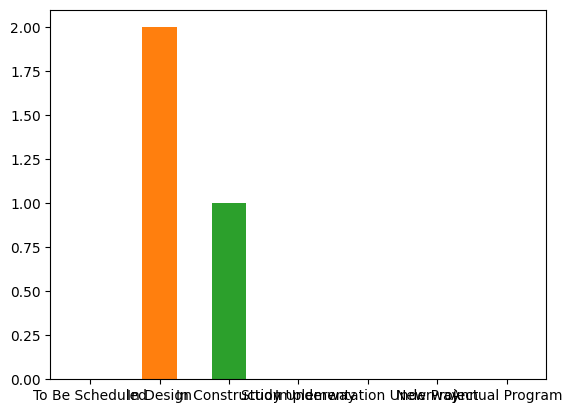

In [13]:
# bar = make_neigborhood_bar_chart('Chinatown')
# text = alt.Chart().mark_text(
#     align="left",
#     baseline="bottom",
#     fontSize=14,
#     fontWeight=600,
#     color='coral'
# ).encode(
#     x=alt.value(410),  # pixels from left
#     y=alt.value(290),  # pixels from top
#     text=alt.value(["Total Funding:", f'{100}'])
# )

# text

In [14]:
lol = capital_plan.loc[capital_plan['Neighborhood'] == 'Roxbury']
sum(lol['Total_Project_Budget'])

158448299